# Components

In [1]:
from imbed.components.segmentation import segmenters
from imbed.components.vectorization import embedders
from imbed.components.planarization import planarizers
from imbed.components.clusterization import clusterers

In [2]:
list(segmenters)

['string_lines', 'jdict_to_segments', 'field_values', 'default']

In [3]:
jdict_to_segments = segmenters['jdict_to_segments']
list(jdict_to_segments('one\n  segment \n per\n  line '))

['one', 'segment', 'per', 'line']

In [1]:
from xdol import resolve_values_to_bytes
from i2 import Sig 

Sig(resolve_values_to_bytes)
help(resolve_values_to_bytes)

Help on partial in module functools:

functools.partial(<function wrap_kvs at 0x10b2b5...unction _resolve_values_to_bytes at 0x10b3ca440>)
    Store wrapper that encodes values (bytes, str, iterables) to bytes.
    It uses json.dumps for lists, tuples, dicts, ints, floats, and bools.
    For other types, it uses the default encoding.
    
    
    >>> wrapped_dict = resolve_values_to_bytes(dict)
    >>> d = wrapped_dict()
    >>> d['a'] = 'hello'
    >>> d['b'] = 123
    >>> d['c'] = [1, 2, 3]
    >>> d['d'] = {'a': 1, 'b': 2}
    >>> d['e'] = None
    >>> d
    {'a': b'hello', 'b': b'123', 'c': b'[1, 2, 3]', 'd': b'{"a": 1, "b": 2}', 'e': b'null'}



In [ ]:
import xdol

b'[1, 2, 3]'

In [ ]:
import codecs
dir(codecs)
codecs.register

['BOM',
 'BOM32_BE',
 'BOM32_LE',
 'BOM64_BE',
 'BOM64_LE',
 'BOM_BE',
 'BOM_LE',
 'BOM_UTF16',
 'BOM_UTF16_BE',
 'BOM_UTF16_LE',
 'BOM_UTF32',
 'BOM_UTF32_BE',
 'BOM_UTF32_LE',
 'BOM_UTF8',
 'BufferedIncrementalDecoder',
 'BufferedIncrementalEncoder',
 'Codec',
 'CodecInfo',
 'EncodedFile',
 'IncrementalDecoder',
 'IncrementalEncoder',
 'StreamReader',
 'StreamReaderWriter',
 'StreamRecoder',
 'StreamWriter',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_false',
 'ascii_decode',
 'ascii_encode',
 'backslashreplace_errors',
 'builtins',
 'charmap_build',
 'charmap_decode',
 'charmap_encode',
 'decode',
 'encode',
 'escape_decode',
 'escape_encode',
 'getdecoder',
 'getencoder',
 'getincrementaldecoder',
 'getincrementalencoder',
 'getreader',
 'getwriter',
 'ignore_errors',
 'iterdecode',
 'iterencode',
 'latin_1_decode',
 'latin_1_encode',
 'lookup',
 'lookup_error',
 'make_encoding_map',
 'make_identit

# Planarization

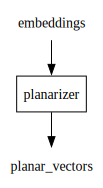

In [1]:
from meshed import code_to_dag

@code_to_dag
def cluster_and_planarize():
    planar_vectors = planarizer(embeddings)

cluster_and_planarize.dot_digraph()

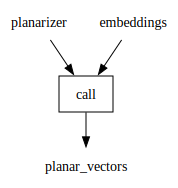

In [2]:
from meshed.scrap.collapse_and_expand import expand_function_calls


expand_function_calls(cluster_and_planarize).dot_digraph()

In [7]:
from imbed.examples.boxes.planarize import planarizer_mall, planarizers, planarizer_factories

list(planarizer_mall)

['planarizer_factories', 'planarizers']

In [19]:
list(planarizers)

['normalize_pca', 'tsne', 'umap', 'ncvis']

In [18]:
import numpy as np
from dol import PickleFiles, wrap_kvs, Files
import dill

DillFiles = wrap_kvs(Files, value_decoder=dill.loads, value_encoder=dill.dumps)
local_store = DillFiles('/Users/thorwhalen/tmp/tmp_demo/')

t = {k: planarizers[k] for k in ['tsne', 'normalize_pca', 'umap']}

local_store.update(t)

In [21]:
list(local_store)

local_store['normalize_pca']

<bound method Pipeline.fit_transform of Pipeline(steps=[('normalize',
                 FunctionTransformer(func=<function <lambda> at 0x34795bf40>,
                                     validate=True)),
                ('pca', PCA(n_components=2))])>

In [32]:
from azuredol import AzureFiles
import os 


azure = AzureFiles(
    container_name="scrap",
    path='demo_20250225',
    connection_string=os.getenv('COS_AZURESTORAGE__CONNECTION_STRING'),
)

azure = wrap_kvs(azure, value_decoder=dill.loads, value_encoder=dill.dumps)

azure

AzureFiles('scrap', path='demo_20250225/')

In [33]:
list(azure)

['tsne']

In [34]:
azure.update(t)

In [35]:
list(azure)

['normalize_pca', 'tsne', 'umap']

In [ ]:
from imbed import planar_embeddings

# Some DAGs

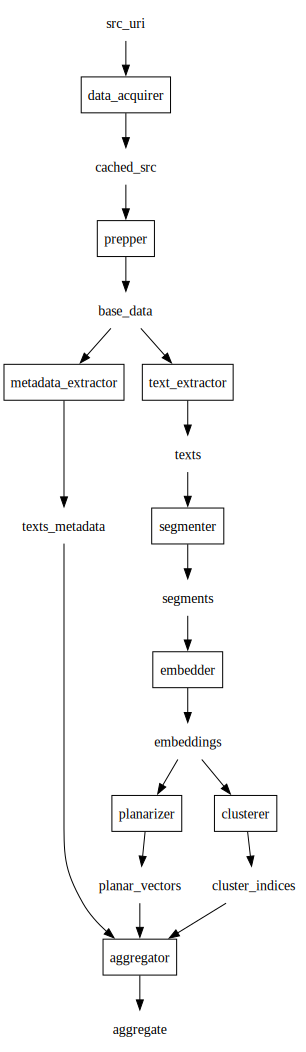

In [ ]:
from meshed import code_to_dag

@code_to_dag
def imbed_dag():
    cached_src = data_acquirer(src_uri)
    base_data = prepper(cached_src)
    texts_metadata = metadata_extractor(base_data)
    texts = text_extractor(base_data)
    segments = segmenter(texts)
    embeddings = embedder(segments)
    planar_vectors = planarizer(embeddings)
    cluster_indices = clusterer(embeddings)
    aggregate = aggregator(texts_metadata, planar_vectors, cluster_indices)

imbed_dag.dot_digraph()

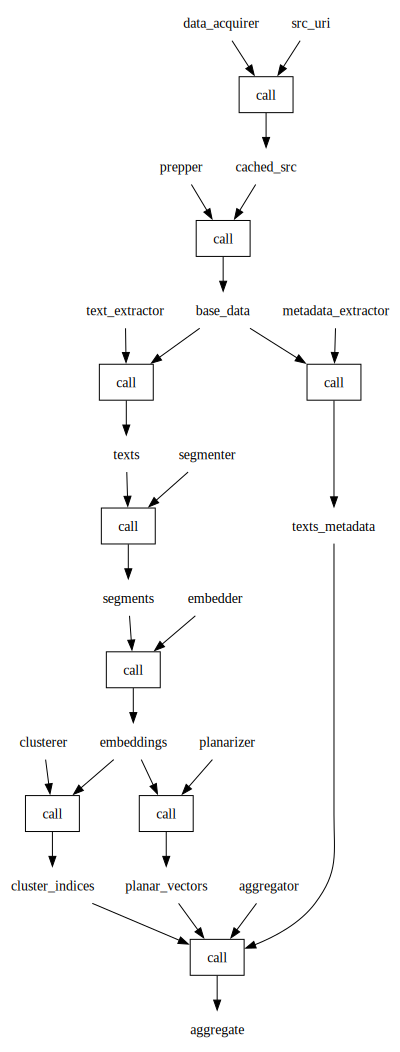

In [ ]:
from meshed.scrap.collapse_and_expand import expand_function_calls, collapse_function_calls

imbed_dag_expanded = expand_function_calls(imbed_dag)
imbed_dag_expanded.dot_digraph()

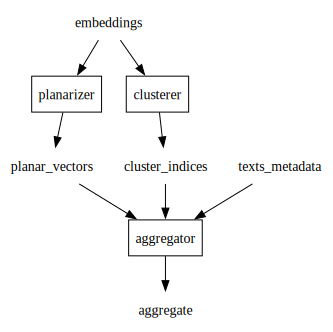

In [5]:
from meshed import code_to_dag

@code_to_dag
def cluster_and_planarize():
    planar_vectors = planarizer(embeddings)
    cluster_indices = clusterer(embeddings)
    aggregate = aggregator(texts_metadata, planar_vectors, cluster_indices)

cluster_and_planarize.dot_digraph()

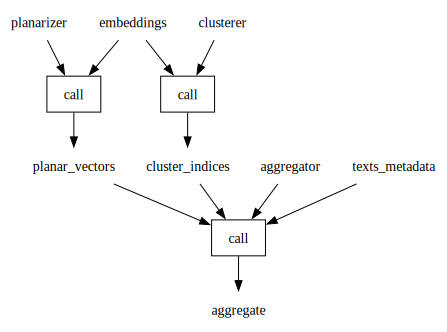

In [6]:
from meshed.scrap.collapse_and_expand import expand_function_calls

expand_function_calls(cluster_and_planarize).dot_digraph()

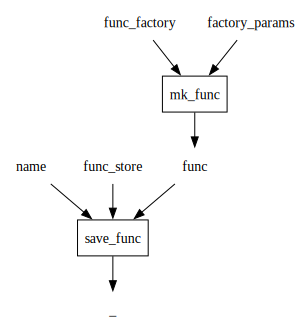

In [2]:
from meshed import code_to_dag

@code_to_dag
def make_and_save_pattern():
    func = mk_func(func_factory, factory_params)
    _ = save_func(func, name, func_store)
    # result = call(func, func_input)

make_and_save_pattern.dot_digraph()

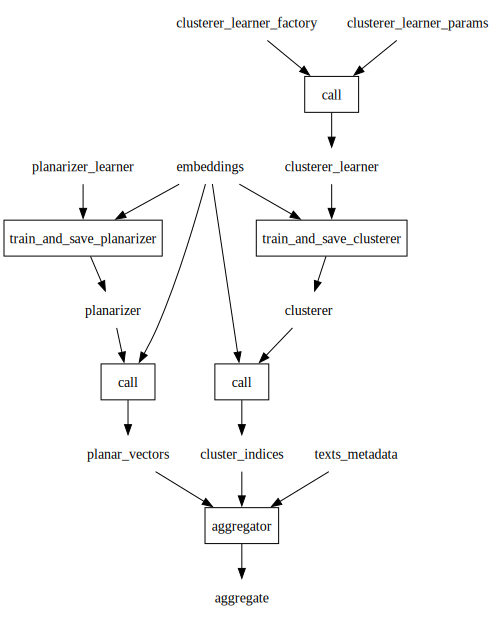

In [3]:
from meshed import code_to_dag

@code_to_dag
def cluster_and_planarize():
    planarizer = train_and_save_planarizer(planarizer_learner, embeddings)
    planar_vectors = call(planarizer, embeddings)

    clusterer_learner = call(clusterer_learner_factory, clusterer_learner_params)
    clusterer = train_and_save_clusterer(clusterer_learner, embeddings)
    cluster_indices = call(clusterer, embeddings)

    aggregate = aggregator(texts_metadata, planar_vectors, cluster_indices)

cluster_and_planarize.dot_digraph()

# fit_transform factories

In [47]:
from imbed.examples.boxes.planarize import mk_parametrized_fit_transform
# from imbed.examples.boxes.planarize import DFLT_DISTANCE_METRIC, partial

from i2 import Sig

from sklearn.decomposition import PCA

mk_pca_fit_transform = mk_parametrized_fit_transform(PCA, n_components=2)

print("Signature of mk_pca_fit_transform:")
print(f"{Sig(mk_pca_fit_transform)}")


pca_transform_1 = mk_pca_fit_transform()
pca_transform_2 = mk_pca_fit_transform(whiten=True)

print(f"{Sig(pca_transform_1)=}")
print(f"{Sig(pca_transform_2)=}")

import numpy as np

X = np.random.rand(5, 3)

print(f"{pca_transform_1(X)=}")
print(f"{pca_transform_2(X)=}")

Signature of mk_pca_fit_transform:
(n_components=2, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', n_oversamples=10, power_iteration_normalizer='auto', random_state=None)
Sig(pca_transform_1)=<Sig (X, y=None)>
Sig(pca_transform_2)=<Sig (X, y=None)>
pca_transform_1(X)=array([[ 0.1033398 , -0.0245193 ],
       [-0.32638353, -0.25448343],
       [ 0.44225621, -0.01881792],
       [-0.20736271,  0.35125006],
       [-0.01184978, -0.0534294 ]])
pca_transform_2(X)=array([[ 0.34642715, -0.11192983],
       [-1.09413906, -1.16170865],
       [ 1.48258031, -0.08590321],
       [-0.69514427,  1.60344518],
       [-0.03972414, -0.24390349]])


# A peep at mongodol

In [1]:
from mongodol import MongoClientReader

m = MongoClientReader()

In [2]:
list(m)

['admin', 'config', 'local', 'mongodol']

In [3]:
db = m['mongodol']
list(db)
mgc = db['test']
list(mgc)

[{'_id': 'test_template'}]

In [4]:
list(mgc[{'_id': 'test_template'}])

[{'_id': 'test_template',
  'prompt_template': 'Give me a random word about {this}'}]